In [53]:
import pandas as pd

url = 'https://raw.githubusercontent.com/aatheveera/Datascience_workbooks/main/Stats_assignments/Descrip_Stats_problem_data_v1.xlsx'
dset1 = pd.read_excel(url,'Problem1')

'''Covariance is a quantitative measure of the degree to which the deviation of one variable (X) from its mean 
is related to the deviation of another variable (Y) from its mean'''

'''When we assume a correlation between two variables, we are essentially deducing that a change in one variable impacts a change in another variable.
 Correlation helps us to determine whether or not, and how strongly, changes in various variables relate to each other'''

'When we assume a correlation between two variables, we are essentially deducing that a change in one variable impacts a change in another variable.\n Correlation helps us to determine whether or not, and how strongly, changes in various variables relate to each other'

In [43]:
'''1.	In a Sound and stereo store in Chicago the manager wants to know 
is there any relationship between the number of weekend television commercials shown and sales at the store at the following week.  
The sample data of the store is provided in the spread sheet tab. Use that to solve the below problem

1.	Find the covariance between the variables and tell us is there any relationship between them
2.	Is the Sales and number of commercials correlated?  If yes - Positive/ Negative 
'''
# Covariance is a measure of how much two random variables vary together.

dset1 = dset1.rename(columns={"No of Commercials (x)":"No_of_commercials","Sales Volume (K$) (y)":"Sales_Volume"})
dset1.head()

dset1.No_of_commercials = dset1.No_of_commercials.astype(float)

#Series is nothing but items of a column in a excel sheet
series1 = pd.Series(dset1.No_of_commercials)
series2 = pd.Series(dset1.Sales_Volume)

covar = series1.cov(series2)

print ("The covariance between the two variables is", covar, ",which is POSITIVE, so when the commerials increase, the sales is also increasing")

print("The correlation between two variables is :",(dset1['No_of_commercials'].corr(dset1['Sales_Volume'])), ",So the correlation is POSITIVE")

The covariance between the two variables is 9.0 ,which is POSITIVE, so when the commerials increase, the sales is also increasing
The correlation between two variables is : 0.9149914219956279 ,So the correlation is POSITIVE


In [52]:
"""2.	In the above problem the Manager has been provided the data with the sales amount measured in Kilo $ (1000$). 
But now the sales team provides a new data in Tab 2 with the amount in $. 
Does this unit of measurement impact the covariance and correlation calculated in problem1. 
The data is in Tab2
		Calculate the new covariance and correlation and confirm 
"""

dset2 = pd.read_excel(url,'Problem2')
dset2 = dset2.rename(columns={"No of Commercials (x)":"No_of_commercials","Sales Volume ($) (y)":"Sales_Volume"}).head()
dset2.head()

series1 = pd.Series(dset2.No_of_commercials)
series2 = pd.Series(dset2.Sales_Volume)

covar = series1.cov(series2)

print ("The covariance for problem 2 is",covar)

corr = (dset1['No_of_commercials'].corr(dset1['Sales_Volume']))

print ("The correlation for problem 2 is",corr)

The covariance for problem 2 is 9000.0
The correlation for problem 2 is 0.9149914219956279


The 1st quartile is 1872.0
The 3rd quartile is 8305.0
The IQR is, 6433.0
The Lower limit is,  -7777
The Upper limit is, 17954


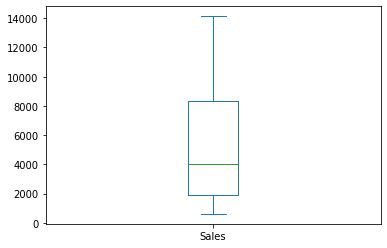

In [112]:
'''The sales report about the pharmaceutical company in million $ for the 21 states in US has been provided in the spread sheet '''

#1.	Provide the five number summary of the box plot
#2.	Compute the lower and upper limits

dset3 = pd.read_excel(url,'Problem3')
import math

Q1 = dset3['Sales'].quantile(0.25)
Q3 = dset3['Sales'].quantile(0.75)
IQR = Q3 - Q1
L = math.ceil(Q1 - 1.5 * IQR)
U = math.floor(Q3 + 1.5 * IQR)

print ("The 1st quartile is", Q1)
print ("The 3rd quartile is", Q3)
print ("The IQR is,", IQR)
print ("The Lower limit is, ", L)
print ("The Upper limit is,", U)

dset3.plot.box()

In [60]:
#3.	Does the data contain any outlier ? 

dset3.sort_values("Sales")

'''The Sales values lie between the Lower and Upper limits, hence NO OUTLIERS'''

,State,Sales
6,Kentucky,608
16,Tennessee,739
11,Mississippi,1356
1,California,1374
9,Massachusetts,1850
2,Colorado,1872
17,Texas,2127
4,Georgia,2459
10,Michigan,2818
18,Virginia,3653


In [67]:
'''4.	Ohio state has the highest sales at $14,138 million. Suppose a data entry error has been made as $ 41,138 million
would this been identified as an outlier and corrected'''

dset3.loc[dset3['State']=='Ohio', 'Sales'] = 41138

dset3

Q1 = dset3['Sales'].quantile(0.25)
Q3 = dset3['Sales'].quantile(0.75)
IQR = Q3 - Q1
L = math.ceil(Q1 - 1.5 * IQR)
U = math.floor(Q3 + 1.5 * IQR)

print ("The 1st quartile is", Q1)
print ("The 3rd quartile is", Q3)
print ("The IQR is,", IQR)
print ("The Lower limit is, ", L)
print ("The Upper limit is,", U)

print ("Since the value of Sales value of the state : Ohio(41138) is higher than the upper limit(17954), it is an OUTLIER")

The 1st quartile is 1872.0
The 3rd quartile is 8305.0
The IQR is, 6433.0
The Lower limit is,  -7777
The Upper limit is, 17954
Since the value of Sales value of the state : Ohio(41138) is higher than the upper limit(17954), it is an OUTLIER


In [88]:
'''5.	Out of 21 states provided what percentile states are above the Washington'''

dset3.sort_values("Sales")

dset3['Percentile_Rank'] = dset3.Sales.rank(pct = True)
dset3.sort_values("Percentile_Rank")
display(dset3.loc[(dset3.Percentile_Rank > 0.619048)])

,State,Sales,Percentile_Rank
0,Arizona,8408,0.809524
3,Florida,8879,0.857143
5,Kansas,11413,0.952381
7,Ohio,14138,1.000000
8,Maryland,6452,0.666667
12,Missouri,10498,0.904762
13,New Jersey,7478,0.714286
20,West Virginia,8305,0.761905


In [89]:
'''6.	What is the 85th percentile ?'''

dset3['Sales'].quantile(0.85)

8879.0

In [114]:
'''4.	In an IPL auction a team wants to buy a foreign player who is an all-rounder to balance their side.
 The team has the budget to spend on only one player and they are looking for a player who could help them in their batting department. 
 The franchise now has the data with the runs scored by player A and player B in their last 20 matches and are confused on their selection
	Can you help them with your analysis? You know what needs to be done '''

dset4 = pd.read_excel(url,'Problem4')
dset4 = dset4.rename(columns={"Player A":"Player_A","Player B":"Player_B"})

std = dset4[['Player_A', 'Player_B']].std()
mean_value = dset4[['Player_A','Player_B']].mean()

print("The total number of runs scored by both players" "\n " , dset4[['Player_A','Player_B']].sum())
print("The average no. of runs scored by both players" "\n ",  dset4[['Player_A','Player_B']].mean())
print("The Std.Dev of both players are" "\n ", dset4[['Player_A', 'Player_B']].std())

coeff = std/mean_value
print ("The Co.eff of variation of both players are" "\n ",coeff)

print("Player B has higher co.eff of variation, hence his consistency is always questionable, I will pick Player A")

The total number of runs scored by both players
  Player_A    700
Player_B    700
dtype: int64
The average no. of runs scored by both players
  Player_A    35.0
Player_B    35.0
dtype: float64
The Std.Dev of both players are
  Player_A    20.206825
Player_B    25.296141
dtype: float64
The Co.eff of variation of both players are
  Player_A    0.577338
Player_B    0.722747
dtype: float64
Player B has higher co.eff of variation, hence his consistency is always questionable, I will pick Player A
